In [1]:
# Autor: Henrique Sérgio de Aquino - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01

#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [6]:
# carregando os dados do arquivo '*.csv' em um dataframe chamado 'passageiros'
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
# exibindo as primeiras linhas do dataframe
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [7]:
# exibindo as ultimas linhas do dataframe
passageiros.tail()

,tempo,nPassageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [8]:
# exibindos dados estatísticos do dataframe
# 'describe' so funciona com colunas numericas
passageiros.describe()

,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


In [9]:
# exibindo os tipos de dados das colunas
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tempo         144 non-null    float64
 1   nPassageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [10]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
# seaborn biblioteca grafica
# matplotlib biblioteca grafica
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='tempo', ylabel='nPassageiros'>

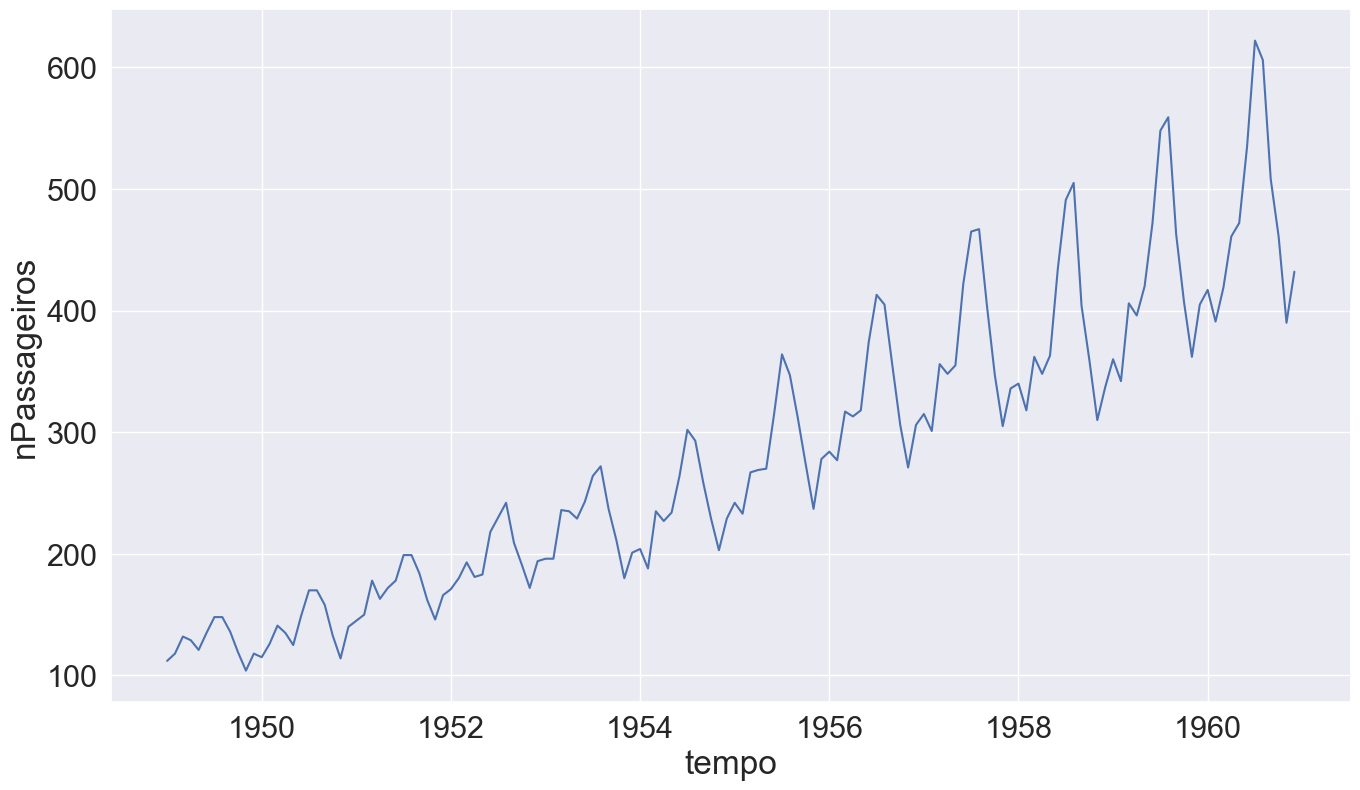

In [5]:
# gerando o gráfico de tempo x passageiros
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [11]:
#Seleciona todas as linhas e colunas, menos a última
Tempo = passageiros.iloc[:,:-1].values

In [12]:
# selecionando todas as linhas e apenas a primeira coluna
nPassageiros = passageiros.iloc[:,1].values

In [13]:
#Podemos separar parte dos dados para treino e teste
# sklearn é biblioteca de machine learning, mais de 80 algoritmos de machine learning
from sklearn.model_selection import train_test_split

In [16]:
# separando 70% da base para treino e 30% da base para teste
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [17]:
# importando a biblioteca do algoritmo
from sklearn import linear_model

In [18]:
# criando um objeto de regressao linear
regressor = linear_model.LinearRegression()

In [19]:
#Ajustando a reta aos dados de treino
# fit treina o modelo
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [22]:
# predict predição, prevendo passageiros a partir do tempo
nPassageiros_predito = regressor.predict(Tempo_teste)

In [23]:
# importando biblioteca numérica numpy
import numpy as np

In [25]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn, outra biblioteca grafica
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


<AxesSubplot:xlabel='Tempo', ylabel='nPassageiros'>

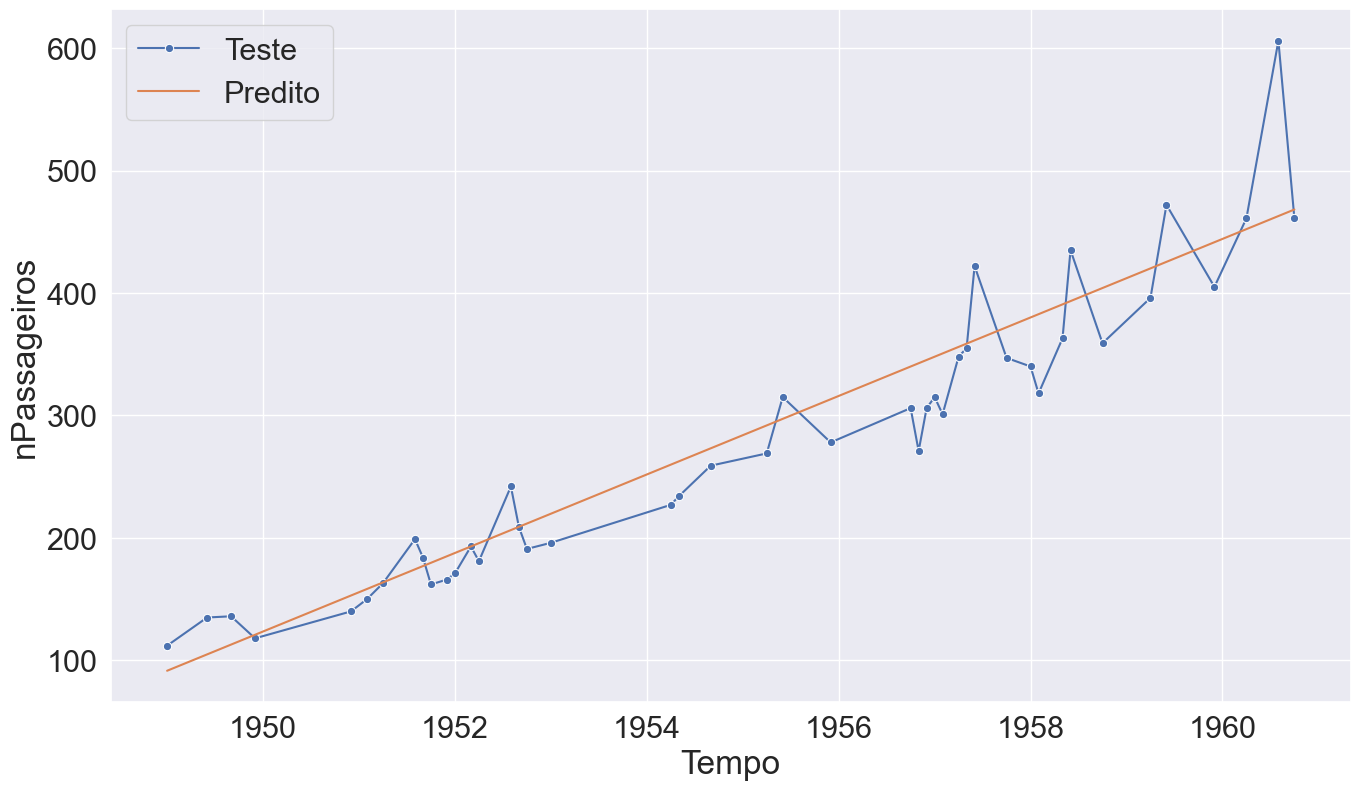

In [26]:
# gerando um gráfico de passageiros ,passageiros predito e tempo
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [27]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

Coeficiente: 
 [32.05679807]


In [29]:
# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % regressor.score(Tempo, nPassageiros))

MSE: 2097.12
Score de variação: 0.85


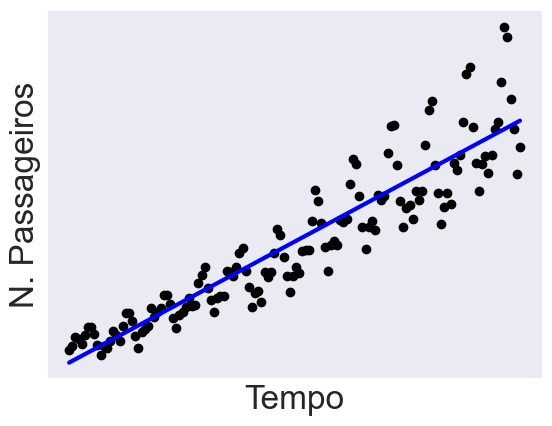

In [30]:
# Scatter Plot representando a regressão linear
plt.scatter(Tempo, nPassageiros,  color = 'black')
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())

plt.show()